In [1]:
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

In [2]:
data1 = pd.read_csv("training.csv")

## Feature Engineering

#### Convert Time to Datetime format

In [3]:
data1['TransactionStartTime'] = pd.to_datetime(data1['TransactionStartTime'], errors='coerce')

#### Extracting features from Datetime

In [4]:
#Extracting Month,Day,Weekday,Hour,Minute from training
data1['Month'] = data1['TransactionStartTime'].dt.month
data1['Weekday'] = data1['TransactionStartTime'].dt.weekday
data1['Day'] = data1['TransactionStartTime'].dt.day
data1['Hour'] = data1['TransactionStartTime'].dt.hour
data1['Minute'] = data1['TransactionStartTime'].dt.minute
data1['Seconds'] = data1['TransactionStartTime'].dt.second

In [5]:
data1=pd.DataFrame(data1)

In [6]:
data1.head(1)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Month,Weekday,Day,Hour,Minute,Seconds
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2018-11-15 02:18:49+00:00,2,0,11,3,15,2,18,49


#### Label Encoder

LabelEncoder converts each class under specified feature to a numerical value.

In [11]:
# convert object types into integer types 
'''le = preprocessing.LabelEncoder()
data['TransactionId'] = le.fit_transform(data['TransactionId'])
data['BatchId'] = le.fit_transform(data['BatchId'])
data['AccountId']  = le.fit_transform(data['AccountId'])
data['SubscriptionId']= le.fit_transform( data['SubscriptionId']) 
data['CustomerId']= le.fit_transform( data['CustomerId'])
data['CurrencyCode']= le.fit_transform( data['CurrencyCode'])
data['ProviderId']= le.fit_transform( data['ProviderId'])
data['ProductCategory']= le.fit_transform( data['ProductCategory'])
data['ProductId']= le.fit_transform( data['ProductId'])
data['ChannelId']= le.fit_transform( data['ChannelId'])'''

"le = preprocessing.LabelEncoder()\ndata['TransactionId'] = le.fit_transform(data['TransactionId'])\ndata['BatchId'] = le.fit_transform(data['BatchId'])\ndata['AccountId']  = le.fit_transform(data['AccountId'])\ndata['SubscriptionId']= le.fit_transform( data['SubscriptionId']) \ndata['CustomerId']= le.fit_transform( data['CustomerId'])\ndata['CurrencyCode']= le.fit_transform( data['CurrencyCode'])\ndata['ProviderId']= le.fit_transform( data['ProviderId'])\ndata['ProductCategory']= le.fit_transform( data['ProductCategory'])\ndata['ProductId']= le.fit_transform( data['ProductId'])\ndata['ChannelId']= le.fit_transform( data['ChannelId'])"

#### Drop Columns

In [7]:
columns_to_drop=['Value','TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','CurrencyCode','CountryCode','TransactionStartTime']
data=data1.drop(columns_to_drop, axis=1)

In [8]:
data.head(1)

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,Month,Weekday,Day,Hour,Minute,Seconds
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2,0,11,3,15,2,18,49


#### Get dummies for categorical

In [9]:
#getting categorical dummies
columns= ["ProviderId", "ProductCategory", "ProductId", "ChannelId"]
data = pd.get_dummies(data, columns=columns)

#### Changing Amount column set to credit(0) and Debit(1) 

In [10]:
data['Amount']=data['Amount'].apply(lambda x: 0 if(x<0) else 1)

In [12]:
data.head(1)

,Amount,PricingStrategy,FraudResult,Month,Weekday,Day,Hour,Minute,Seconds,ProviderId_ProviderId_1,...,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,1,2,0,11,3,15,2,18,49,0,...,0,0,0,0,0,0,0,0,1,0


### Balancing the Dataset ### 

Here we'll use **Synthetic Oversampling:** This method helps to avoid overfitting. In this method, a small subset of minority is chosen and synthetic examples of this subset are created to balance up the overall dataset. This adds new information to the dataset and increases the overall number of observations.
We use ***SMOTE*** (synthetic minority oversampling technique) to balance the dataset.

In [13]:
X1=data.drop(['FraudResult'], axis=1)
y1=data[['FraudResult']]

In [14]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, 
                                                    test_size=0.2, 
                                                    random_state=30)

In [15]:
smote_algo=SMOTE(random_state=0)
smote_data_X,smote_data_Y=smote_algo.fit_sample(X_train,y_train)
smote_data_X=pd.DataFrame(data=smote_data_X, columns=X_train.columns)
smote_data_Y=pd.DataFrame(data=smote_data_Y,columns=['FraudResult'])

#Join X and Y smote data into one
smote_data=smote_data_X
smote_data['FraudResult']=smote_data_Y['FraudResult']

#Count of fraud and non-fraud cases on smote after resampling
print("Fraud: {}".format((smote_data["FraudResult"]==1).sum()))
print("Non-Fraud: {}".format((smote_data["FraudResult"]==0).sum()))

Fraud: 76368
Non-Fraud: 76368


[]

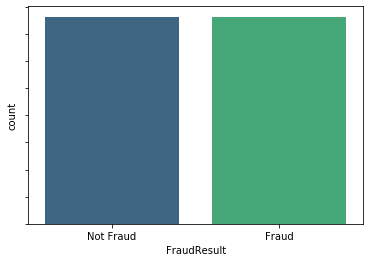

In [16]:
#Visualizing Fraud and Non-Fraud Transactions
fig, ax = plt.subplots()
g = sns.countplot(smote_data.FraudResult, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

### Spliting Dataset

In [17]:
X=smote_data.drop(['FraudResult'], axis=1)
y=smote_data[['FraudResult']]

### Model Development

In [18]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

#### Logistic Regression

In [19]:
LR = LogisticRegression(C=0.01,solver='lbfgs').fit(X_train, y_train)
LR_predict = LR.predict(X_test)

print('The Logistic Regression F1-score score is {}'.format(f1_score(y_test,LR_predict,average='weighted')))
print('The Logistic Regression Accuracy score is {}'.format(accuracy_score(y_test,LR_predict)))

The Logistic Regression F1-score score is 0.9424225638980631
The Logistic Regression Accuracy score is 0.9425494304046091


#### Random Forest Classifier

In [20]:
forest_clas = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clas.fit(X_train, y_train)

RF_predict = forest_clas.predict(X_test)

print('The  RFC F1-score score is {}'.format(f1_score(y_test,RF_predict,average='weighted')))
print('The  RFC Accuracy score is {}'.format(accuracy_score(y_test,RF_predict)))

The  RFC F1-score score is 0.999083409645137
The  RFC Accuracy score is 0.999083409715857


#### SVR

In [21]:
'''from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
svm_predictions = svm_reg.predict(X_test)

print('The  SVR F1-score score is {}'.format(f1_score(y_test,svm_predictions,average='weighted')))
print('The  SVR Accuracy score is {}'.format(accuracy_score(y_test,svm_predictions)))'''

'from sklearn.svm import SVR\n\nsvm_reg = SVR(kernel="linear")\nsvm_reg.fit(X_train, y_train)\nsvm_predictions = svm_reg.predict(X_test)\n\nprint(\'The  SVR F1-score score is {}\'.format(f1_score(y_test,svm_predictions,average=\'weighted\')))\nprint(\'The  SVR Accuracy score is {}\'.format(accuracy_score(y_test,svm_predictions)))'

### KNN

In [22]:
'''Ks = 8
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    KNN_predict=neigh.predict(X_test)
    
    print('The  KNN F1-score score is {}'.format(f1_score(y_test,KNN_predict,average='weighted')))
    print('The  KNN Accuracy score is {}'.format(accuracy_score(y_test,KNN_predict)))'''

The  KNN F1-score score is 0.9932888973476043
The  KNN Accuracy score is 0.9932892497053817
The  KNN F1-score score is 0.9935180781997337
The  KNN Accuracy score is 0.9935183972764174
The  KNN F1-score score is 0.9874274563826889
The  KNN Accuracy score is 0.9874296189603248
The  KNN F1-score score is 0.9876239657293433
The  KNN Accuracy score is 0.9876260311640697
The  KNN F1-score score is 0.9826119296348532
The  KNN Accuracy score is 0.982617519968574
The  KNN F1-score score is 0.9830706470731532
The  KNN Accuracy score is 0.9830758151106456
The  KNN F1-score score is 0.9781545641518523
The  KNN Accuracy score is 0.9781655100170223


In [35]:
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
KNN_predict=neigh.predict(X_test)

print('The  KNN F1-score score is {}'.format(f1_score(y_test,KNN_predict,average='weighted')))
print('The  KNN Accuracy score is {}'.format(accuracy_score(y_test,KNN_predict)))

The  KNN F1-score score is 0.9932888973476043
The  KNN Accuracy score is 0.9932892497053817


### Normalize Data

In [23]:
'''X= preprocessing.StandardScaler().fit(X).transform(X)'''

'X= preprocessing.StandardScaler().fit(X).transform(X)'

In [24]:
# train the normalization
'''from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X)'''

'from sklearn.preprocessing import StandardScaler,MinMaxScaler\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaler = scaler.fit(X)'

### Check accuracy before Feature selection

In [25]:
'''cv = KFold(n_splits=10, random_state=0, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))'''

'cv = KFold(n_splits=10, random_state=0, shuffle=False)\nclassifier_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))\ny_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)\nprint("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))\nprint("R_squared: " + str(round(r2_score(y,y_pred),2)))'

##  Feature selection techniques.

1. Univariate Selection

2. Feature Importance

3. Correlation Matrix with Heatmap

4. Variance

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.



In [26]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Columns','Score']  #naming the dataframe columns

In [27]:
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                               Columns         Score
14             ProductCategory_airtime  34498.608590
11             ProviderId_ProviderId_4  30686.001173
47               ChannelId_ChannelId_2  29867.001205
29              ProductId_ProductId_15  28282.341904
13             ProviderId_ProviderId_6  27254.000587
42               ProductId_ProductId_6  26248.000152
39               ProductId_ProductId_3  19338.016723
24              ProductId_ProductId_10  11234.657702
1                      PricingStrategy  10998.263426
2                                Month  10181.619948
6                               Minute   9491.806743
4                                  Day   9396.282989
10             ProviderId_ProviderId_3   7704.136287
0                               Amount   6567.064337
48               ChannelId_ChannelId_3   5368.922111
3                              Weekday   4938.430570
16  ProductCategory_financial_services   3553.632921
23               ProductId_ProductId_1   2290.

## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [29]:
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[2.06241939e-02 3.83890900e-02 2.29590436e-02 2.46518446e-02
 3.07198046e-02 2.25257258e-02 2.63076410e-02 2.19395780e-02
 1.67884447e-02 2.64789778e-05 9.62285764e-03 8.54856660e-02
 4.27489685e-02 1.06287670e-01 1.47679463e-01 5.17718335e-03
 2.51273041e-02 1.02340732e-03 2.03855505e-05 9.89153488e-04
 1.47193299e-04 7.33383563e-03 7.80045845e-03 6.55592953e-03
 2.42439548e-02 5.62982691e-03 2.00763337e-05 1.14855684e-03
 4.56439132e-03 6.95531627e-02 6.59475852e-06 2.44354642e-03
 6.59283728e-04 1.03340977e-03 7.83742287e-03 2.37780374e-04
 1.12554522e-06 9.52321797e-04 6.19455869e-05 4.80313962e-02
 4.65411699e-03 1.08899198e-04 5.24646969e-02 2.05112971e-04
 4.96606207e-04 8.82256342e-05 1.57684663e-03 8.28332804e-02
 1.95594483e-02 6.56650109e-04]


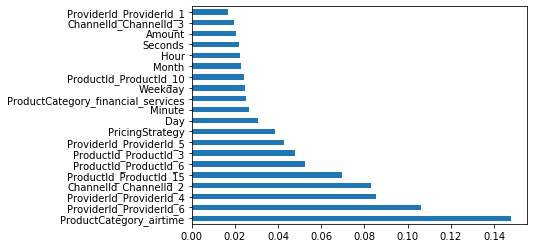

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

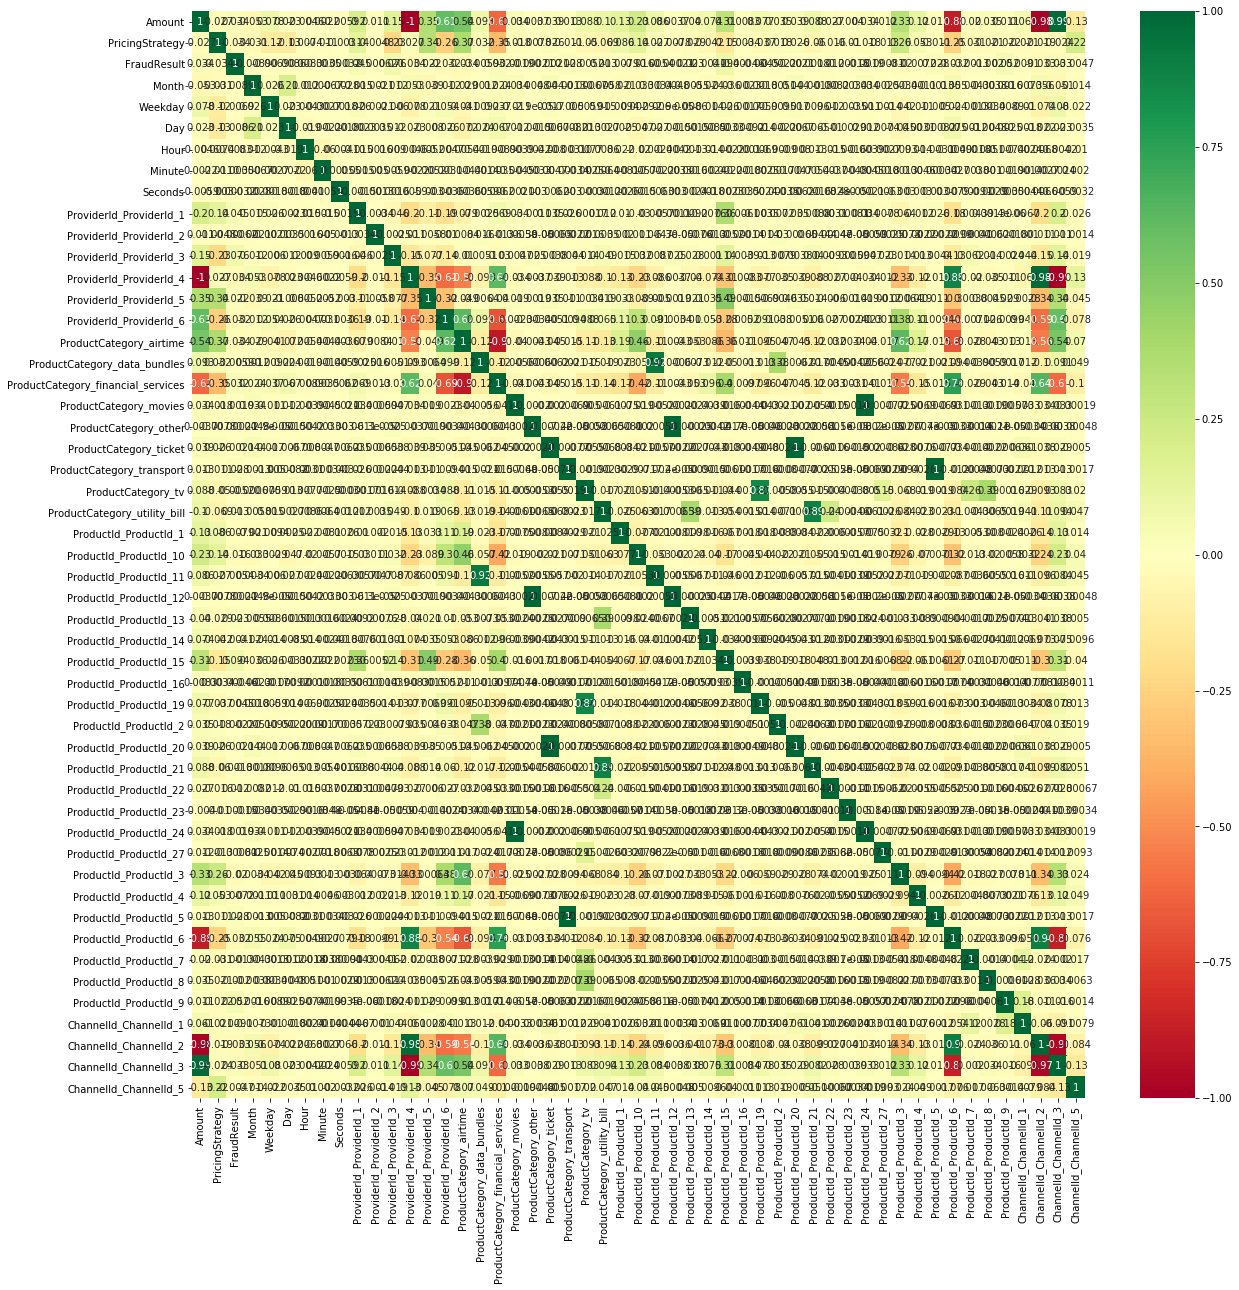

In [31]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
abs(data.corr()["FraudResult"])

Amount                                0.034272
PricingStrategy                       0.033821
FraudResult                           1.000000
Month                                 0.008887
Weekday                               0.006913
Day                                   0.008636
Hour                                  0.008295
Minute                                0.003508
Seconds                               0.000323
ProviderId_ProviderId_1               0.045104
ProviderId_ProviderId_2               0.000617
ProviderId_ProviderId_3               0.076205
ProviderId_ProviderId_4               0.034272
ProviderId_ProviderId_5               0.022490
ProviderId_ProviderId_6               0.032070
ProductCategory_airtime               0.033998
ProductCategory_data_bundles          0.005888
ProductCategory_financial_services    0.032375
ProductCategory_movies                0.001925
ProductCategory_other                 0.000206
ProductCategory_ticket                0.002139
ProductCatego

<h3>Filter Features by Variance</h3>

In [33]:
data.var()

Amount                                  0.239843
PricingStrategy                         0.537178
FraudResult                             0.002013
Month                                  27.293420
Weekday                                 3.473196
Day                                    80.332184
Hour                                   23.493065
Minute                                298.933146
Seconds                               299.699682
ProviderId_ProviderId_1                 0.055510
ProviderId_ProviderId_2                 0.000188
ProviderId_ProviderId_3                 0.031200
ProviderId_ProviderId_4                 0.239843
ProviderId_ProviderId_5                 0.128907
ProviderId_ProviderId_6                 0.229657
ProductCategory_airtime                 0.249143
ProductCategory_data_bundles            0.016577
ProductCategory_financial_services      0.249359
ProductCategory_movies                  0.001826
ProductCategory_other                   0.000021
ProductCategory_tick

In [36]:
best_features=['']
X=smote_data(columns = best_features)
y=smote_data[['FraudResult']]

TypeError: 'DataFrame' object is not callable

In [ ]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [ ]:
#Model Accuracy after Selection
LR = LogisticRegression(C=0.01,solver='lbfgs').fit(X_train, y_train)
LR_predict = LR.predict(X_test)

print('The Logistic Regression F1-score score is {}'.format(f1_score(y_test,LR_predict,average='weighted')))
print('The Logistic Regression Accuracy score is {}'.format(accuracy_score(y_test,LR_predict)))